In [1]:
#Wczytanie zbioru danych z wykorzystaniem biblioteki pandas
import pandas as pd

dataset = pd.read_csv('covtype.data', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [2]:
# Przedstawienie informacji o zbiorze danych, liczba próbek, typ wartości poszczególnych cech
# Dodatkowo jak widać w zbiorze nie ma brakujących wartości
# W zbiorze nie ma danych kategorycznych, wymagających kodowania 

print("Informacje odnośnie po")
dataset.info()
dataset.isna().sum()

Informacje odnośnie po
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 2

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [3]:
#Szczegółowe informacje odnośnie zbioru danych, m.in.wartości maksymalne w poszczególnych kolumnach
#oraz średnie i odchylenia standardowe - informacje istotne w kontekście dalszej analizy zbioru
#Dodatkowo możemy zauważyć że dane nie są znormalizowane, w związku z tym należy ją wykonać
#(najlepiej przed podziałem na zbiór testowy i treningowy)

dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
# W zbiorze posiadamy 7 klas reprezentowanych przez próbki
# Poniżej przedstawiona została liczba próbek reprezentujących poszczególne klasy, w zbiorze danych w kolejności malejącej

print("Liczba próbek w każdej z klas - dane posortowane malejąco")
dataset[54].value_counts()

Liczba próbek w każdej z klas - dane posortowane malejąco


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

In [5]:
#Ekstrakcja kolumn do dwóch zmiennych
#y - klasa do której należy określona próbka
#X - zbiór cech reprezentujacych określoną klasę

y = dataset.iloc[:,54]
X = dataset.iloc[:,:54]

In [6]:
#Wykonanie normalizacji danych w zbiorze z wykorzystaniem biblioteki sklearn

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.192862,0.283487,0.330216,0.835221,0.879208,0.561135,0.276076,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184608,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Podział zbioru danych na zbiór treningowy oraz testowy w stosunku 80%-20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=222)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(389278, 54) (389278,)
(191734, 54) (191734,)


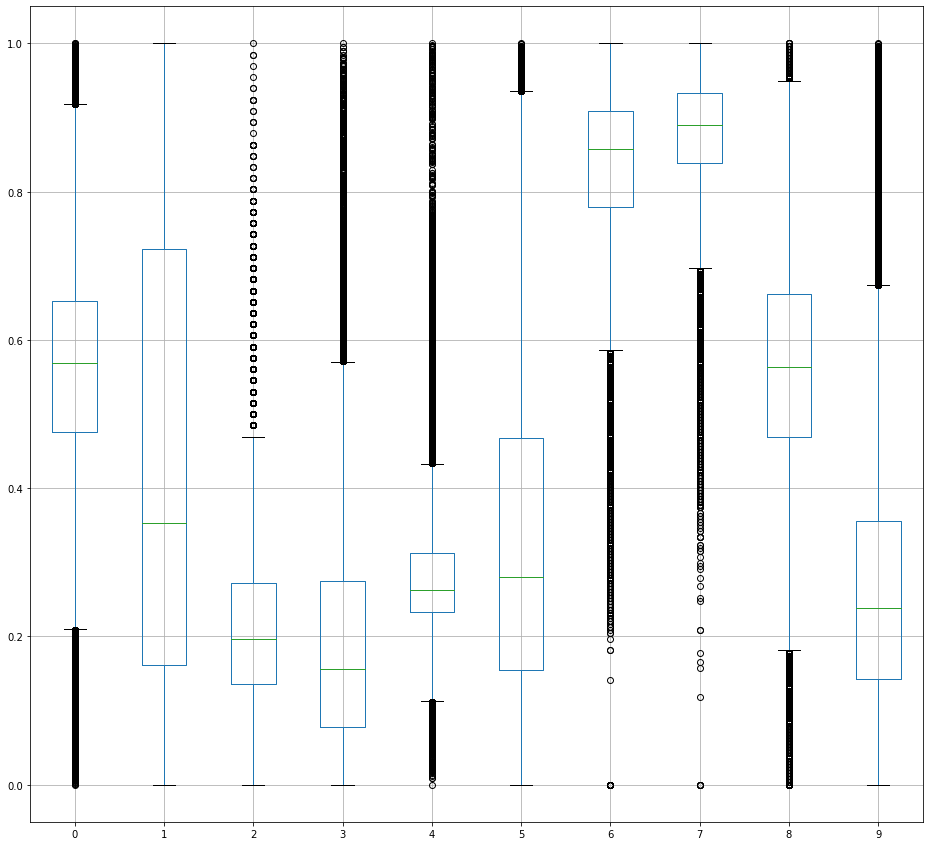

In [8]:
#Poniżej został przedstawiony wykres pudełkowy dla klas które nie są reprezentowane wartościami 0-1
#Na podstawie wykresu możemy zauwżyć, że w przedstawionych klasach nie występują wartości odstające, które należałoby
#usunąć lub zmodyfikować - zbiór danych jest gotowy do wykonywania klasyfikacji

from matplotlib import pyplot as plt
X1 = X.iloc[:,:10]
X1.boxplot(figsize=(16,15))

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
X_train['Class'] = y_train.tolist()



In [10]:
# Kroki mające na celu wyznaczenie współczynnika Fishera:

    # 1) Wyliczamy wektory wartości średnie cech dla wszystkich klas 
    # 2) Obliczmay macierz kowariancji dla każdej z klas
    # 3) Obliczmay wartość współczynnika Fishera dla wszystkich przestrzeni 
    # 4) Wybieramy przestrzeń dla której wartość współczynnika Fishera jest największa

# 1) Wartości średnie cech dla wszystkich klas
feauteres_average_for_classes = pd.DataFrame()

for cover_type in range(1,8):
     feauteres_average_for_classes[cover_type] = X_train[X_train.Class == cover_type].mean()
feauteres_average_for_classes



,1,2,3,4,5,6,7
0,0.635009,0.531405,0.267764,0.180925,0.464219,0.280848,0.752168
1,0.433312,0.422084,0.489055,0.385259,0.387757,0.503968,0.426246
2,0.199077,0.205163,0.314620,0.284564,0.252358,0.288887,0.216200
3,0.193879,0.200687,0.150943,0.075884,0.151645,0.114678,0.256891
4,0.278150,0.283014,0.304865,0.276719,0.288491,0.282242,0.313850
5,0.367181,0.341413,0.132824,0.127852,0.188650,0.145678,0.383865
6,0.834744,0.841796,0.795225,0.898492,0.879806,0.758552,0.854410
7,0.879585,0.887099,0.849449,0.852606,0.861378,0.826677,0.872760
8,0.566203,0.563080,0.552095,0.436856,0.478882,0.585074,0.530864
9,0.279933,0.302168,0.126939,0.119516,0.220710,0.146954,0.287902


In [11]:
import numpy as np

# 2) Macierz kowariancji dla każdej z klas

classes_covariance_matrix = []

for cover_type in range(1,8):
    p = X_train[X_train.Class == cover_type]
    p = p.iloc[:,:54]
    v = np.cov(p.values.T)
    classes_covariance_matrix.append(v)

In [12]:
import itertools

# Wyznaczenie unikalnych par cech w zbiorze
t = range(1, 55)
c = list(itertools.combinations(t, 2))
unq = set(c)
print(t)

range(1, 55)


In [13]:
# Z uwagi na fakt że mamy doczynienia z 7 klasami, musimy obliczyć najpierw rozrzut międzyklasowy dla analizowanych cech
# Następnie obliczamy rozrzut wewnątrzklasowy  - suma wyznaczników macierzy rozrzutu
# W efekcie końcowym, stosunek tych wartości pozowli na wzyanczenie wspólczynnika Fishera dla każdej pary cech
# Para ceh która będzie miała największą wartość współczynnika, to para która zostanie wykorzystana w dalszej 
# Części zadania 

fisher_scores  = []

def count_classes_avg(first_feature, second_feature):
    
    first_f = 0
    second_f = 0
    
    for c in range(1, 8):
        first_f += feauteres_average_for_classes[c][first_feature]
        second_f += feauteres_average_for_classes[c][second_feature]
    avg = np.array([first_f/7, second_f/7])
    return avg

def count_interclass_spread(first_feature, second_feature, classes_selected_features_avg):
    counter_sum = np.array([0, 0], dtype='float64')
    for c in range(1, 8):
        x = np.array(feauteres_average_for_classes[c][first_feature], feauteres_average_for_classes[c][second_feature])
        r = (x - classes_selected_features_avg) * (x - classes_selected_features_avg).T
        counter_sum += r
    result = counter_sum[0] * counter_sum[0] + counter_sum[1] * counter_sum[1]

    return result

def count_classes_determinants_sum(first_feature, second_feature):
    classes_determinant = 0
    
    for c in range(7):
        f_c = classes_covariance_matrix[c]
        c1 = np.array([f_c[first_feature][first_feature], f_c[second_feature][second_feature]])
        c2 = np.array([f_c[first_feature][second_feature], f_c[first_feature][second_feature]])
        features_cov = np.array([c1, c2])
        classes_determinant += np.linalg.det(features_cov)
    return classes_determinant
    
# Główna pętla - analizująca każdą parę cech ze zbioru
for pair in unq:
    # Pobranie i zapisanie w zmiennych cech 
    first_feature = list(pair)[0]
    second_feature = list(pair)[1]
    
    # Obliczenie średniej dla wszystkich klas, w kontekście analizowanych cech
    classes_selected_features_avg = count_classes_avg(first_feature - 1, second_feature - 1)
    
    # Obliczenie rozrzutu między klasowego 
    interclass_spread = count_interclass_spread(first_feature - 1, second_feature -1, classes_selected_features_avg)
    
    # Obliczenie rozrzutu wewnątrzklasowego  sumy wyznaczników
    class_determinants = count_classes_determinants_sum(first_feature - 1, second_feature - 1)
    
    # Obliczenie wartości wsółczynnika Fishera dla zadanych cech
    result = interclass_spread / class_determinants
    fisher_scores.append(result)

# Posortowanie zbioru zawwierającego wartości wsp. Fishera 
w = pd.DataFrame(fisher_scores, columns=['result'])
w = w.replace([np.inf, -np.inf], np.nan)
test = w.sort_values('result', ascending=False)
test

C:\Users\karol\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


,result
1351,6.082177e+08
332,6.041668e+08
831,3.084486e+08
127,2.282442e+08
216,2.260487e+08
...,...
1371,NaN
1386,NaN
1418,NaN
1427,NaN


In [14]:
# Na podstawie otrzymanych wyników zauważamy, że indeks pary cech która ma najwyższy współczynnik Fishera, a co za tym 
# idzie zostaje wybrana do dalszych etapów zadania to 1351. Są to cechy przedstawone w kolumnach 7 i 20 (w zbiorze par cech
# zostało wykonane przesunięcie wartości kolumn o +1) ze zbioru

print("Wybrana para cech: ")
print(list(unq)[1351])

Wybrana para cech: 
(8, 21)


In [15]:
x_train = X_train.loc[:, [7, 20]]

In [17]:
# Klasyfikacja

# Algorytm kNN

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 15)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    print(scores.mean())
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
# lgorytm k-means

from sklearn.cluster import KMeans

k_means_range = range(1, 20)
k_means_scores = []

for k in k_means_range:
    kmeans = KMeans(n_clusters=k)
    scores = cross_val_score(kmeans, x_train, y_train, cv=6, scoring='accuracy')
    print(scores.mean())
    k_means_scores.append(scores.mean())

plt.plot(k_means_range, k_means_scores)
plt.xlabel('Value of K for k-means')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
# NM 

from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score

n_centroid = NearestCentroid()

scores = cross_val_score(n_centroid, x_train, y_train, cv=6, scoring='accuracy')
n_centroid_scores = scores.mean()

print(n_centroid_scores)

In [ ]:
# Dla najlepszego algorytmu zbiór testowy

